<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISES_6_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

### 1

In [3]:
A = np.matrix([[-1,-2],[1,0]])

In [4]:
eigenval, eigenvec = np.linalg.eig(A)

In [5]:
print(eigenval)

[-0.5+1.32287566j -0.5-1.32287566j]


In [6]:
print(eigenvec)

[[ 0.81649658+0.j          0.81649658-0.j        ]
 [-0.20412415-0.54006172j -0.20412415+0.54006172j]]


In [31]:
def analytical(t):

    x1 = -1.2247*(0.816496*np.cos(np.sqrt(7)/2*t))*np.exp(-t/2) + 1.38894*0.816496*np.sin(np.sqrt(7)/2*t)*np.exp(-t/2)
    x2 = -1.2247*(-0.2041*np.cos(np.sqrt(7)/2*t) - 0.540*np.sin(np.sqrt(7)/2*t))*np.exp(-t/2) + 1.38894*(0.5400*np.cos(np.sqrt(7)/2*t) - 0.2041*np.sin(np.sqrt(7)/2*t))*np.exp(-t/2)

    return [x1, x2]

In [32]:
t = np.linspace(0,10,100)
x1, x2 = analytical(t)

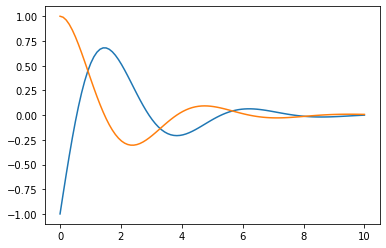

In [33]:
plt.plot(t,x1, t, x2)

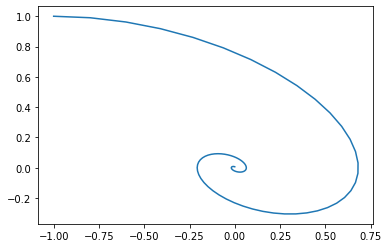

In [34]:
plt.plot(x1,x2)

In [35]:
def numerical(s,t):

    # state variables
    x1 = s[0]
    x2 = s[1]

    # odes
    dx1dt = -x1 - 2*x2
    dx2dt = x1

    return [dx1dt, dx2dt]

In [36]:
# initial conditions
s = [-1, 1]

In [37]:
out = odeint(numerical, s, t)

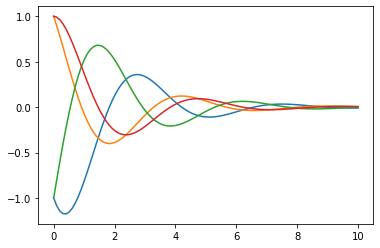

In [38]:
plt.plot(t,out, t, x1, t ,x2)

### 2

In [39]:
A = np.matrix([[0, 0.9056],[-0.7500, -2.5640]])

In [40]:
eigenval, eigenvec = np.linalg.eig(A)

In [41]:
print(eigenval)

[-0.3   -2.264]


In [42]:
print(eigenvec)

[[ 0.94926867 -0.37139068]
 [-0.31446621  0.92847669]]


In [77]:
def analytical(t):

    c1 = -0.728436
    c2 = 0.8303185

    x1 = c1*np.array(eigenvec[0,0])*np.exp(-0.3*t) + c2*np.array(eigenvec[0,1])*np.exp(-2.264*t)
    x2 = c1*np.array(eigenvec[1,0])*np.exp(-0.3*t) + c2*np.array(eigenvec[1,1])*np.exp(-2.264*t)

    return [x1, x2]

In [78]:
x1, x2 = analytical(t)

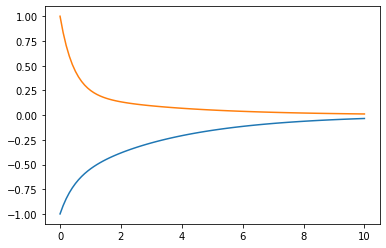

In [79]:
plt.plot(t,x1,t,x2)

In [80]:
def numerical(s,t):

    # state variables 
    x1 = s[0]
    x2 = s[1]

    # odes 
    dx1dt = 0.9056*x2
    dx2dt = -0.7500*x1 - 2.5640*x2

    return [dx1dt, dx2dt]

In [81]:
s = [1, -1]

In [82]:
out = odeint(numerical,s,t)

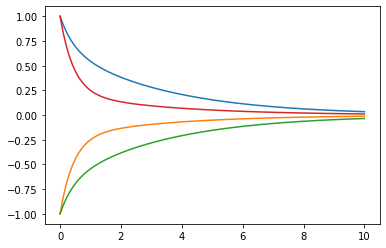

In [84]:
plt.plot(t,out, t, x1, t, x2)

### 8

In [85]:
A = np.matrix([[0,-1.0],[1.0,0.0]])

In [86]:
eigenval, eigenvec = np.linalg.eig(A)

In [87]:
print(eigenval)

[0.+1.j 0.-1.j]


In [88]:
print(eigenvec)

[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [104]:
def analytical(t):

    x1 = 0.5*np.cos(t) + 0.25*np.sin(t)
    x2 = -0.25*np.cos(t) + 0.5*np.sin(t)

    return [x1, x2]

In [105]:
x1, x2 = analytical(t)

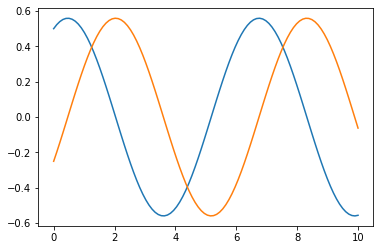

In [106]:
plt.plot(t,x1,t,x2)

In [93]:
def numerical(s,t):

    # state variables
    x1 = s[0]
    x2 = s[1]

    # odes
    dx1dt = -x2
    dx2dt = x1

    return [dx1dt, dx2dt]

In [94]:
# initial conditions 
s = [0.5, -0.25]

In [95]:
out = odeint(numerical, s, t)

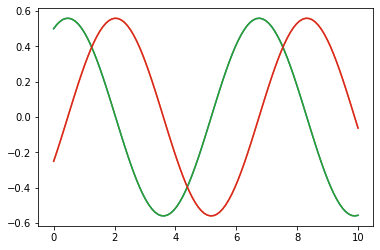

In [107]:
plt.plot(t,out,t,x1,t,x2)

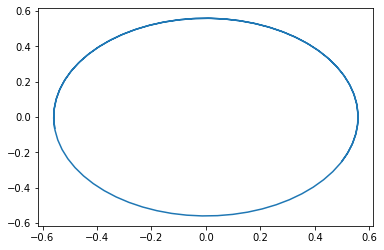

In [108]:
plt.plot(x1,x2)

In [114]:
A = np.matrix([[-3,0],[0,-1]])

In [115]:
eigenval, eigenvec = np.linalg.eig(A)

In [116]:
print(eigenval)

[-3. -1.]


In [117]:
print(eigenvec)

[[1. 0.]
 [0. 1.]]
